![example image](./000000269314.jpg)

Countless hours of footage have been filmed by hidden cameras for a wildlife documentary. The footage needs to be examined to find out when animals have been captured in the footage. Classifying all captured images based on whether the feature animals could save weeks of work. 

You are part of a data science team involved in making this documentary, and your task is to prepare an image processing pipeline. The pipeline will augment existing datasets of images featuring animals so that an object-detection model can be trained and used on the footage.

Data augmentation involves creating variations of the original images through transformations like rotation, scaling, and equalizing to increase the training dataset's diversity and models' robustness. This technique enriches the dataset without collecting more data, helping models generalize better to new, unseen images.

In this project, you will perform image processing operations on five images featuring animals. The output of this project will be a pipeline transforming images to produce augmented datasets.

## Data

The `COCO` (Common Objects in Context) dataset is a dataset designed for training and evaluating computer vision models on a variety of tasks, including object detection. Five images featuring animals have been downloaded from this dataset. 

The list `file_names` is already available and contains the names of the image files available in the current directory.

In [10]:
# Import Matplotlib to read and display images 
import matplotlib.pyplot as plt
# Import the necessary modules from scikit-image for image transformation, and exposure adjustment
from skimage.transform import resize, rotate 
from skimage.exposure import equalize_adapthist

# List of filenames for the images to be processed
file_names = ["000000546829.jpg","000000012062.jpg","000000417085.jpg","000000269314.jpg","000000575357.jpg"]

In [11]:
# Implement image_processing function

def image_processing(file_names:list, size:tuple = (250,250), rotation_angle:float = 0, equalization_clip_limit:int = None):
    processed_images = []
    for file_name in file_names:
        # read images
        img = plt.imread(file_name)
        # resize images
        img = resize(img, size)
        # rotate images
        img = rotate(img, angle=rotation_angle)
        # equalization clip
        if equalization_clip_limit is not None:
            # apply contrast equalization
            img = equalize_adapthist(img, clip_limit=euqalization_clip_limit)
        # append image to the processed_images list
        processed_images.append(img)
    # return 
    return processed_images
    

In [12]:
# apply the image_processing function
transformed_images = image_processing(file_names)

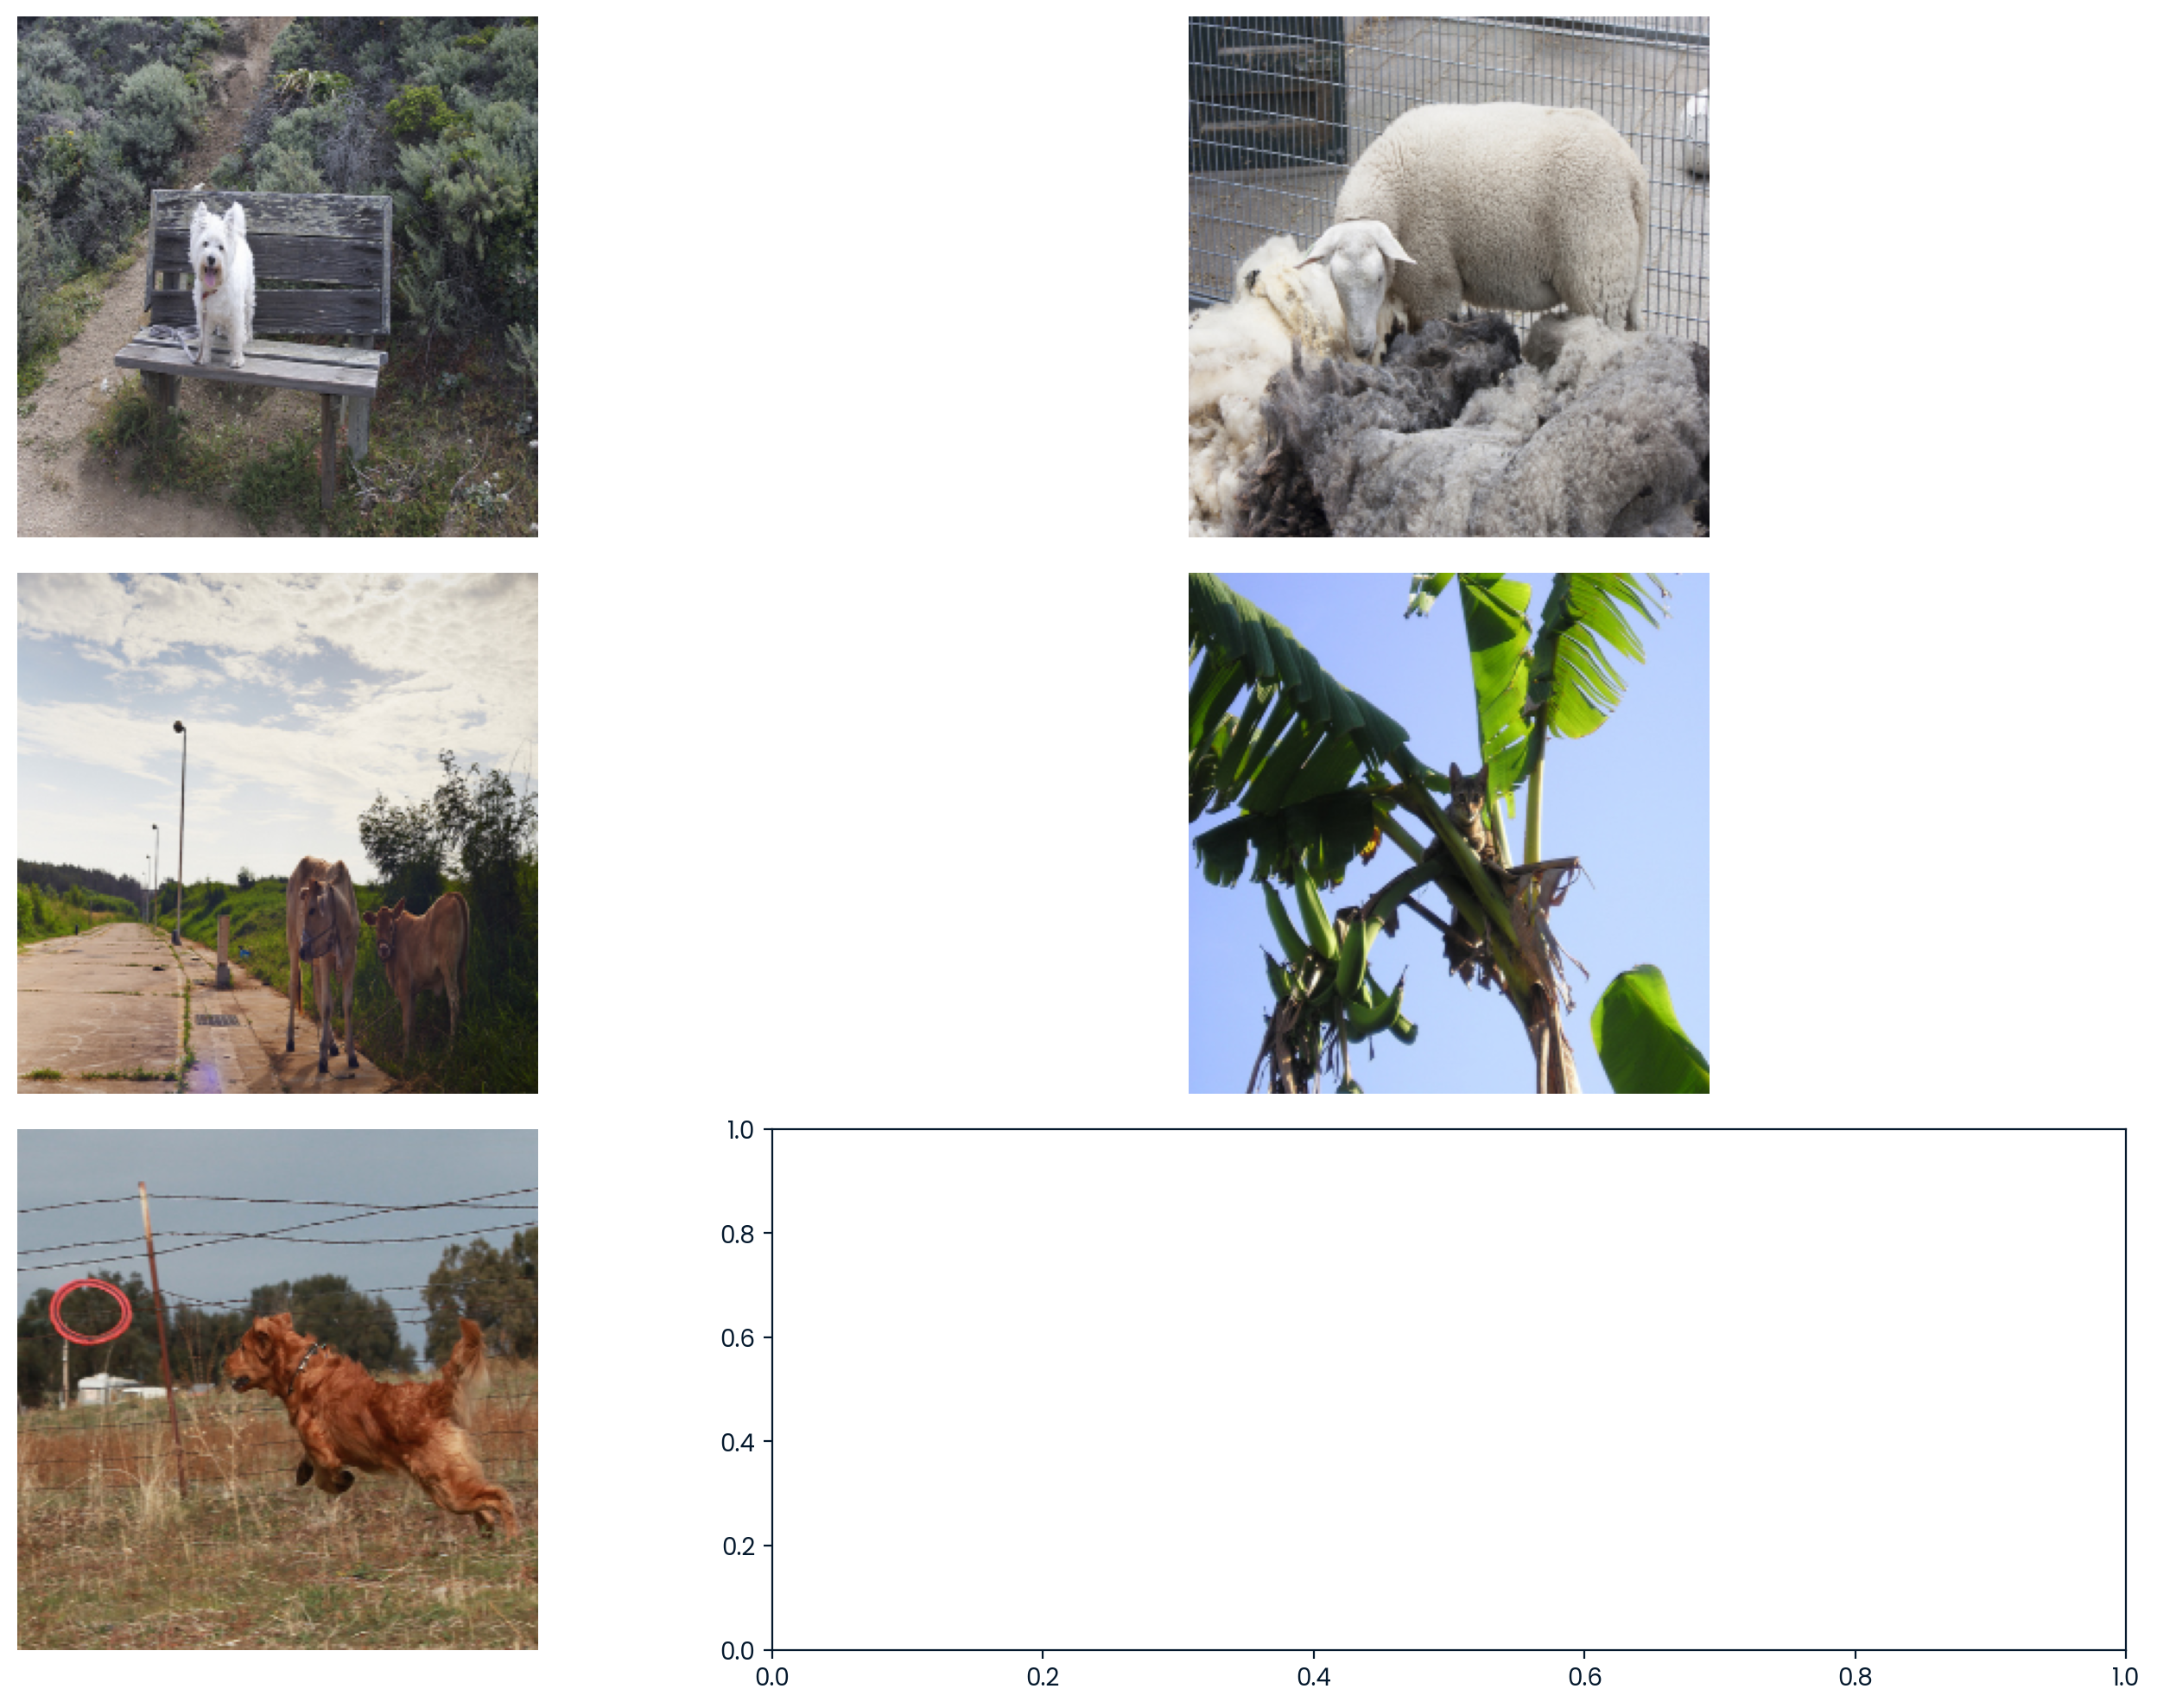

In [13]:
# display transformed images
# Determine the number of images to display in a row and column based on the length of transformed_images
num_images = len(transformed_images)
rows = int(num_images ** 0.5) + 1
cols = num_images // rows + (num_images % rows > 0)

# Create a figure with appropriate size for your images
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

# Loop through the transformed_images list to plot each image in its own subplot
for i, img in enumerate(transformed_images):
    # Assuming img is an RGB image (HxWxC), you can use ax.imshow(img)
    # If it's a grayscale image (HxW), use ax.imshow(img, cmap='gray')
    axs[i // cols, i % cols].imshow(img)
    axs[i // cols, i % cols].axis('off')  # Hide axes

# Adjust the spacing between subplots for better layout
plt.tight_layout()

# Show the plot
plt.show()